In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import pickle

In [2]:
# Load preprocessed datasets
with open('preprocessed/train_images.pkl', 'rb') as f:
    train_images = pickle.load(f)
with open('preprocessed/train_labels.pkl', 'rb') as f:
    train_labels = pickle.load(f)
with open('preprocessed/valid_images.pkl', 'rb') as f:
    valid_images = pickle.load(f)
with open('preprocessed/valid_labels.pkl', 'rb') as f:
    valid_labels = pickle.load(f)

# Evaluate on test set
with open('preprocessed/test_images.pkl', 'rb') as f:
    test_images = pickle.load(f)
with open('preprocessed/test_labels.pkl', 'rb') as f:
    test_labels = pickle.load(f)

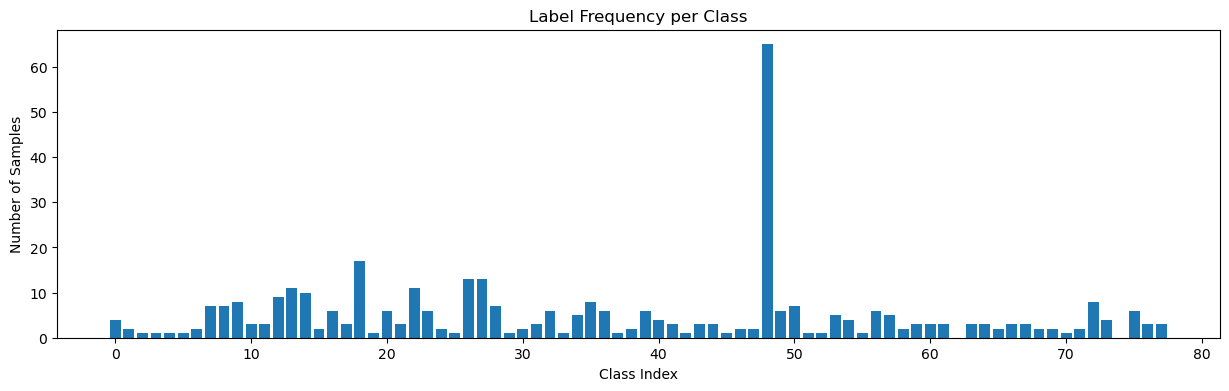

In [3]:
import matplotlib.pyplot as plt
import numpy as np

label_sums = np.sum(train_labels, axis=0)
plt.figure(figsize=(15, 4))
plt.bar(np.arange(len(label_sums)), label_sums)
plt.title("Label Frequency per Class")
plt.xlabel("Class Index")
plt.ylabel("Number of Samples")
plt.show()


# Treat for overfitted model

In [4]:
# Look like model is over fitted and validation loss is kind a high

In [5]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('my_tuned_model_1.h5')

# Confirm it's loaded
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 224, 224, 96)        │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 96)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 112, 112, 256)       │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 448)                 │      89,915,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 448)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 78)                  │          35,022 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,765,072 (346.24 MB)

 Trainable params: 90,765,070 (346.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [6]:
tf.compat.v1.enable_eager_execution()

In [7]:
print(tf.executing_eagerly())

True


In [8]:
# from tensorflow.keras import layers, models
# import numpy as np

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for Multi-label
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Compile model again in case it's from a checkpoint
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # for multi-label classification
    metrics=['binary_accuracy']
)

# Train model using data generator
model.fit(
    datagen.flow(train_images, train_labels, batch_size=16),
    validation_data=(valid_images, valid_labels),
    epochs=20
)


C:\Users\acer\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - binary_accuracy: 0.9334 - loss: 0.2723 - val_binary_accuracy: 0.9618 - val_loss: 0.2139
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - binary_accuracy: 0.9607 - loss: 0.1896 - val_binary_accuracy: 0.9622 - val_loss: 0.1481
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - binary_accuracy: 0.9598 - loss: 0.1590 - val_binary_accuracy: 0.9618 - val_loss: 0.1483
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - binary_accuracy: 0.9625 - loss: 0.1516 - val_binary_accuracy: 0.9618 - val_loss: 0.1474
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - binary_accuracy: 0.9641 - loss: 0.1431 - val_binary_accuracy: 0.9653 - val_loss: 0.1442
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - binary_accuracy: 0.9629 - loss: 0.1502 - val_binary_accuracy: 0.9620 - val_loss: 0.1492
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 48s 6s/step - binary_accuracy: 0.9653 - loss: 0.1446 - val_binary_accuracy: 0.9618 - val_loss: 0.1463
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━

In [12]:
# Train model with history tracking
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=16),
    validation_data=(valid_images, valid_labels),
    epochs=20
)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - binary_accuracy: 0.9694 - loss: 0.0963 - val_binary_accuracy: 0.9608 - val_loss: 0.1566
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - binary_accuracy: 0.9666 - loss: 0.1038 - val_binary_accuracy: 0.9613 - val_loss: 0.1659
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - binary_accuracy: 0.9679 - loss: 0.1100 - val_binary_accuracy: 0.9611 - val_loss: 0.1678
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - binary_accuracy: 0.9671 - loss: 0.1033 - val_binary_accuracy: 0.9608 - val_loss: 0.1646
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - binary_accuracy: 0.9644 - loss: 0.1081 - val_binary_accuracy: 0.9627 - val_loss: 0.1738
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - binary_accuracy: 0.9671 - loss: 0.0995 - val_binary_accuracy: 0.9627 - val_loss: 0.1673
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - binary_accuracy: 0.9664 - loss: 0.0993 - val_binary_accuracy: 0.9627 - val_loss: 0.1764
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━

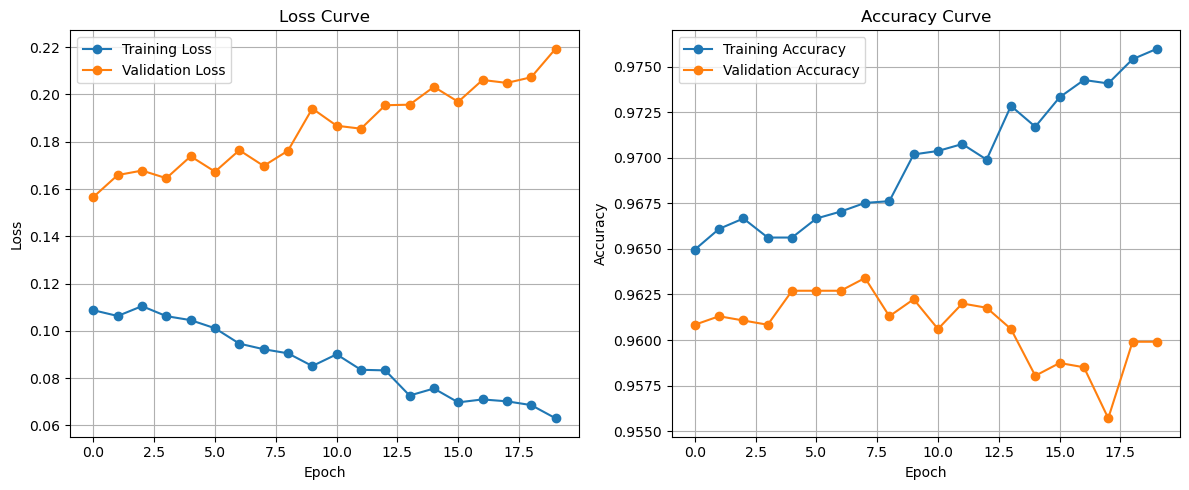

In [13]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# ---- Loss Plot ----
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# ---- Accuracy Plot ----
plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
CLASS_NAMES = [
    "airplane", "apple", "backpack", "banana", "baseball bat", "baseball glove", "bear", "bed", "bench", "bicycle",
    "bird", "boat", "book", "bottle", "bowl", "broccoli", "bus", "cake", "car", "carrot", "cat", "cell phone", "chair",
    "clock", "couch", "cow", "cup", "dining table", "dog", "donut", "elephant", "fire hydrant", "fork", "frisbee",
    "giraffe", "handbag", "horse", "hot dog", "keyboard", "kite", "knife", "laptop", "microwave", "motorcycle",
    "mouse", "orange", "oven", "parking meter", "person", "pizza", "potted plant", "refrigerator", "remote",
    "sandwich", "scissors", "sheep", "sink", "skateboard", "skis", "snowboard", "spoon", "sports ball", "stop sign",
    "suitcase", "surfboard", "teddy bear", "tennis racket", "tie", "toilet", "toothbrush", "traffic light", "train",
    "truck", "tv", "umbrella", "vase", "wine glass", "zebra"
]

In [43]:
import matplotlib.pyplot as plt

def display_prediction(image, prediction, threshold=0.3):
    """
    Shows image and prints predicted labels based on threshold.
    """  
    predicted_classes = [CLASS_NAMES[i] for i, val in enumerate(prediction) if val > threshold]

    plt.imshow(image)
    plt.axis('off')
    plt.title("Predicted: " + ", ".join(predicted_classes) if predicted_classes else "No objects detected")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


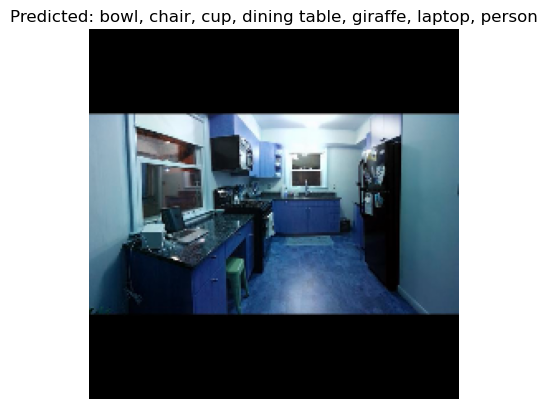

In [45]:
# Predict on a test image
index = 1  # change to see other images
test_img = test_images[index]
pred = model.predict(np.expand_dims(test_img, axis=0))[0]  # shape: (78,)
display_prediction(test_img, pred, threshold=0.1387)

In [46]:
model.save('my_tuned_model_2.h5')
print("Best model saved to my_tuned_model.h5")

Best model saved to my_tuned_model.h5


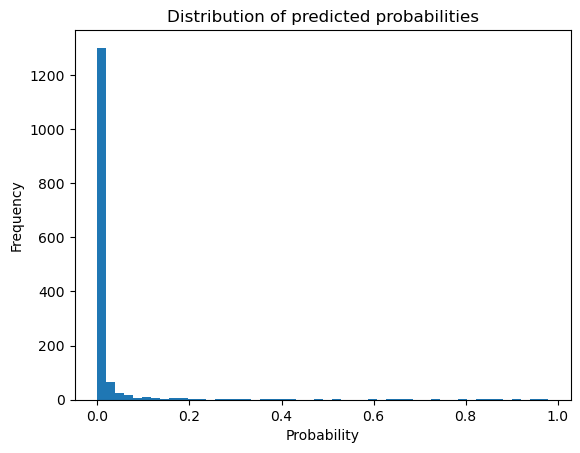

In [33]:
import matplotlib.pyplot as plt

plt.hist(y_probs.flatten(), bins=50)
plt.title("Distribution of predicted probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Most prediction probabilities are near 0, that usually points to underconfidence. 
# And it likely means my model isn't learning the multi-label classification task well enough.

In [40]:
from sklearn.metrics import classification_report
# Predict on test set
test_preds = model.predict(test_images)
test_preds = (test_preds > 0.0315).astype(int)
print(classification_report(test_labels, test_preds, zero_division=0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.33      1.00      0.50         1
          13       0.40      1.00      0.57         2
          14       0.17      1.00      0.29         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.0

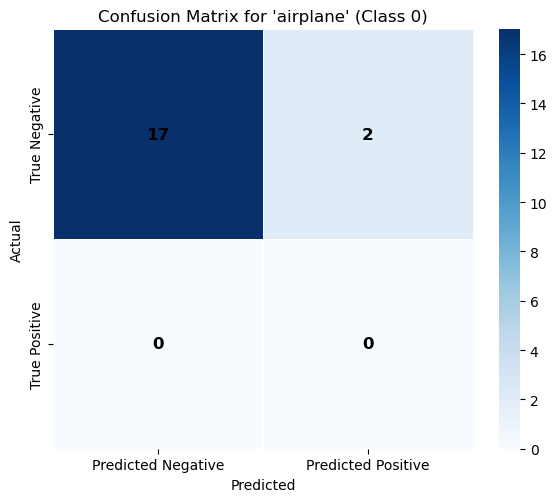

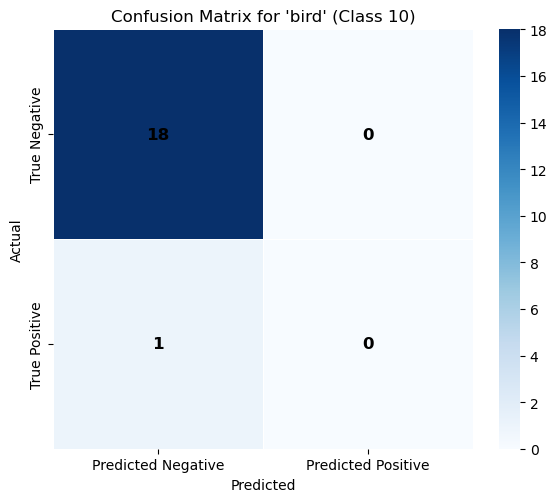

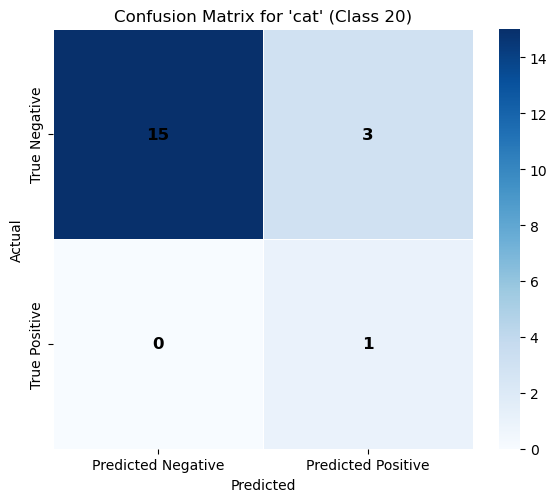

In [41]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrices for all classes
mlcm = multilabel_confusion_matrix(test_labels, test_preds)

# Selected class indices to plot
selected_classes = [0, 10, 20]  # You can add more indices here

for cls_idx in selected_classes:
    cm = mlcm[cls_idx]
    class_name = CLASS_NAMES[cls_idx]

    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(cm, annot=False, cmap="Blues", square=True,
                     xticklabels=["Predicted Negative", "Predicted Positive"],
                     yticklabels=["True Negative", "True Positive"],
                     cbar=True, linewidths=0.5, linecolor='white')

    # Manually add annotations (values inside the matrix)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            value = int(cm[i, j])
            ax.text(j + 0.5, i + 0.5, f"{value}", ha="center", va="center",
                    color="black", fontsize=12, fontweight='bold')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix for '{class_name}' (Class {cls_idx})")
    plt.tight_layout()
    plt.show()
